In [54]:
import metnum
import pandas as pd 
import numpy as np
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/train.csv")

subset_random_indexes = np.random.choice(data.index.values,10000)

subset_random_indexes

array([26489, 27885, 12725, ...,  8679, 24245, 21994])

In [55]:
train_reduced = data.iloc[subset_random_indexes,:]
y = train_reduced["label"]
X = train_reduced[train_reduced.columns[1:]]

In [56]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

pca = metnum.PCA(19)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

model = metnum.KNNClassifier(6)

model.fit(X_train_PCA, y_train)

resultados = model.predict(X_test_PCA)

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from seaborn import heatmap
%matplotlib inline
cMatrix = confusion_matrix(y_test,resultados)

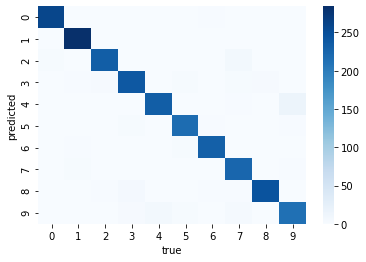

In [58]:
ax = plt.axes()
hm = heatmap(cMatrix, ax= ax, cmap="Blues")

ax.set_xlabel("true")

ax.set_ylabel("predicted")
plt.savefig("./graphics/confusion.jpg")

In [59]:
precisiones = []
recalls = []
for k in range(10):
    precisiones.append(cMatrix[k][k]/(cMatrix[k].sum()))
    recalls.append(cMatrix[k][k]/(cMatrix[:,k].sum()))

In [60]:
recalls = pd.Series(recalls)
precisiones = pd.Series(precisiones)
precision_promedio = precisiones.mean()
recall_promedio = recalls.mean()

In [61]:
result = pd.DataFrame([precisiones,recalls]).T
result.columns = ["precision", "recall"]
index = result.index
index.name = "clase"
index = [str(i) for i in range(10)]
index.append("promedio")
result

,precision,recall
clase,,
0,0.981132,0.981132
1,0.989547,0.965986
2,0.947368,0.962963
3,0.930233,0.948617
4,0.924901,0.955102
5,0.964602,0.947826
6,0.974684,0.966527
7,0.965665,0.918367
8,0.942529,0.976190


In [62]:
promedios = pd.Series([result["precision"].mean(),result["recall"].mean()])
promedios.index = ["precision","recall"]
promedios.name = "promedio"
result = result.append(promedios)

In [63]:
import dataframe_image as dfi

dfi.export(result, "./graphics/recalls-presiciones.jpg")

In [64]:
result

,precision,recall
clase,,
0,0.981132,0.981132
1,0.989547,0.965986
2,0.947368,0.962963
3,0.930233,0.948617
4,0.924901,0.955102
5,0.964602,0.947826
6,0.974684,0.966527
7,0.965665,0.918367
8,0.942529,0.976190


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
rfc_preds = model_xgb.predict(X_test)
print(accuracy_score(y_test, rfc_preds))

0.9568


<AxesSubplot:>

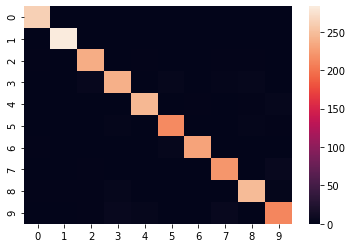

In [72]:
cMatrix_forest = confusion_matrix(y_test,rfc_preds)
heatmap(cMatrix_forest)

In [71]:
print(accuracy_score(y_test, resultados))
resultados

0.954


array([7., 2., 3., ..., 6., 7., 2.])

In [68]:
from sklearn.metrics import cohen_kappa_score

In [75]:
cohen_kappa_score(rfc_preds,resultados)

0.9421900644820914

In [77]:
cMatrix

array([[260,   0,   1,   0,   0,   1,   2,   0,   1,   0],
       [  0, 284,   0,   0,   1,   0,   1,   1,   0,   0],
       [  3,   0, 234,   0,   1,   1,   0,   7,   1,   0],
       [  0,   2,   4, 240,   0,   3,   1,   3,   4,   1],
       [  0,   1,   0,   0, 234,   0,   0,   2,   0,  16],
       [  0,   0,   1,   3,   0, 218,   2,   0,   0,   2],
       [  1,   2,   0,   0,   0,   3, 231,   0,   0,   0],
       [  1,   3,   1,   0,   1,   0,   0, 225,   0,   2],
       [  0,   1,   2,   6,   1,   1,   2,   2, 246,   0],
       [  0,   1,   0,   4,   7,   3,   0,   5,   0, 213]])